<a href="https://colab.research.google.com/github/JoseFerrer/Deep_Learning_fot_Teaching/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementando LeNet

## Paqueterías que vamos a utilizar

<img src="https://techscript24.com/wp-content/uploads/2020/10/86498201-a8bd8680-bd39-11ea-9d08-66b610a8dc01.png" width="50%">

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5ufeQEq94DZpcunTim55puXY6dNookrlRwmiOd1PQFraMl3sjijiYwIDw1j1hfzo2h6c&usqp=CAU" width="50%">

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQwDfwjwyxZsRFpjoPFjlsNnKk3J58Gh3bjAap7Td81dyrYSt1XbtZI7lsgartOMjBqM60&usqp=CAU" width="50%">


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils

import matplotlib.pyplot as plt
import numpy as np

## Importamos los datos

Usaremos un conocido dataset de imágenes de cifras escritas a mano llamado [MNIST](http://yann.lecun.com/exdb/mnist/), el cual es considerado el "Hello World" del deep learning.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png" width="90%">



MNIST consta de 60000 imágenes de 28x28 pixeles en escala de grises [0..255]. Para cargar estas imágenes, tenemos una función dentro de Keras llamada `mnist.load_data()`. El cual nos separa la data entre los datos de entrenamiento y los datos de test.

In [ ]:
img_rows, img_cols = 28, 28 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Preparamos los datos

Vamos a redimensionar las imágenes en tensores (N imágenes, 28 filas, 28 columnas, 1 canal).
De igual manera, debemos normalizar el rango de valores de los pixeles de [0, 255] a [0, 1].



In [ ]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('Dimension de X_train: ', X_train.shape)
print(X_train.shape[0], "muestras de entrenamiento")
print(X_test.shape[0], "muestras de test")

Dimension de X_train:  (60000, 28, 28, 1)
60000 muestras de entrenamiento
10000 muestras de test


Ahora convertimos las categorías de los dígitos de 0 a 9 en un one-hot encoded binary vector. Hacemos esto porque será lo que le pasemos a la red neuronal como las categorías de las muestras tanto de entrenamiento como de test.

In [ ]:
nclases = 10
Y_train = utils.to_categorical(y_train, nclases)
Y_test = utils.to_categorical(y_test, nclases)
print("One-hot encoding: {}".format(Y_train[0, :]))

One-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Veamos un poco el dataset MNIST.

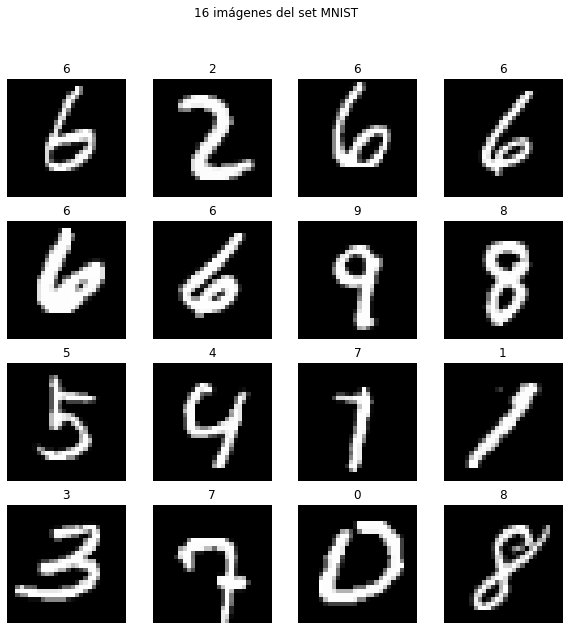

In [ ]:
ids_imgs = np.random.randint(0,X_train.shape[0],16)
plt.figure(figsize=(10,10))
for i in range(len(ids_imgs)):
	img = X_train[ids_imgs[i],:,:]
	plt.subplot(4,4,i+1)
	plt.imshow(img[:,:,0], cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('16 imágenes del set MNIST')
plt.show()

## Definición del modelo



<img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png" width="100%">

Podemos configurar las capas de convolución, a través del objeto Conv2D, el cual tiene la siguiente configuración: `Conv2D(number_filters, kernel_size, input_shape=(number_channels, img_col), padding, activation)`. 

In [ ]:
np.random.seed(1)		

modelo = tf.keras.Sequential()

modelo.add(Conv2D(6, (5, 5), input_shape=[img_rows, img_cols, 1], padding='same', activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))
modelo.add(Conv2D(120, (5, 5), activation='relu'))


modelo.add(Flatten())
modelo.add(Dense(84, activation='relu'))
modelo.add(Dense(10, activation='softmax'))
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 1080)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                9

In [ ]:
sgd = SGD(lr=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

## Entrenamos al modelo

Hiperparàmetros que empezamos a configurar:

*  Epocas (num_epochs): Número de veces que el modelo pasa sobre todas las imágenes del set de entrenamiento.
*  Batch Size (batch_size): Número de imágenes procesadas a la vez.

In [ ]:
num_epochs = 10 
batch_size = 128 
modelo.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, 
          verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 35s 6ms/step - loss: 0.6942 - accuracy: 0.7732 - val_loss: 0.0655 - val_accuracy: 0.9787
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0641 - accuracy: 0.9794 - val_loss: 0.0448 - val_accuracy: 0.9856
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0377 - val_accuracy: 0.9870
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0470 - val_accuracy: 0.9852
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0346 - val_accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0305 - val_accuracy: 0.9902
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0147 - accuracy: 0.9948 - val_loss: 0.0335 - val_accuracy: 0.9906
Epoch

## Precisión del modelo con el dataset de test

In [ ]:
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Precisión en el set de validación: 99.0%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


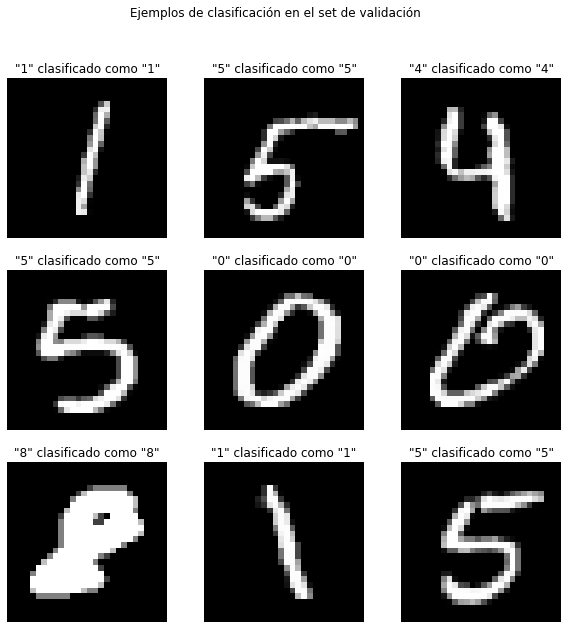

In [ ]:
res = modelo.predict_classes(X_test[:9])
plt.figure(figsize=(10,10))

ids_imgs = np.random.randint(0,X_test.shape[0],9)
for i in range(len(ids_imgs)):
	idx = ids_imgs[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = y_test[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()